## 0. Data Load and Preview

In [19]:
import pandas as pd
df1 = pd.read_csv("../data/raw/Bengaluru_House_Data 2.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 1. Data Cleanning

In [20]:
df1.shape

(13320, 9)

## 2. Exploration of Duplicates and Unique Values in Categorical Columns

In [21]:
# Count and return the number of duplicate rows in the DataFrame
df1.duplicated().sum()

# Display the column names of the DataFrame
df1.columns

# Define a list of categorical columns for exploration
categorical_cols = ['area_type', 'availability', 'society', 'size']

# Loop through each categorical column and print its name and unique values
for i in categorical_cols:
    print(i)  # Print the column name
    print(df1[i].unique())  # Print the unique values in the column
    print(f"Number of unique values: {df1[i].nunique()}")  # Print the count of unique values
    print()  # Print a blank line for better readability

area_type
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
Number of unique values: 4

availability
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
Number of unique values: 81

society
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
Number of unique val

In [22]:
print("unique values",df1['society'].unique())
print("number of unique values",df1['society'].nunique())

unique values ['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
number of unique values 2688


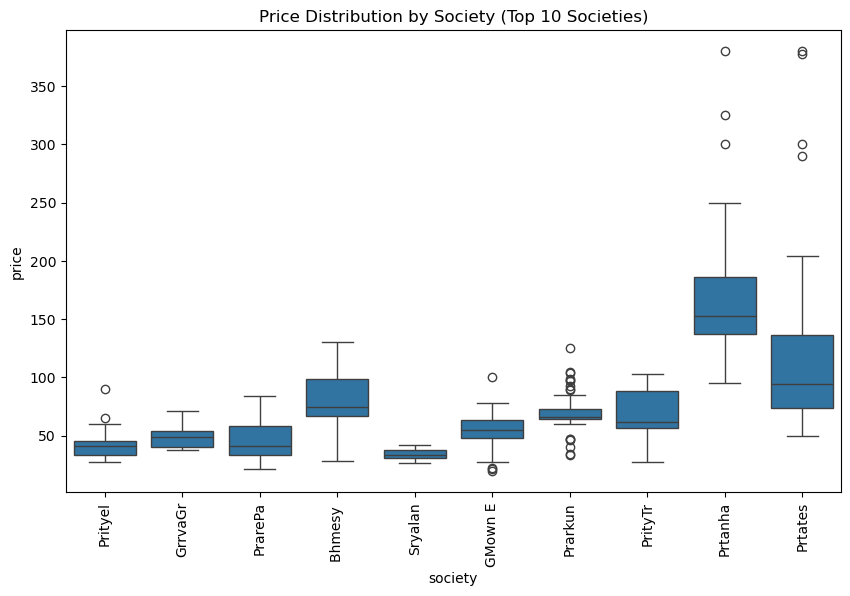

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of price across different societies
top_societies = df1['society'].value_counts().index[:10]  # Take the top 10 most frequent societies
df_top_societies = df1[df1['society'].isin(top_societies)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='society', y='price', data=df_top_societies)
plt.xticks(rotation=90)
plt.title('Price Distribution by Society (Top 10 Societies)')
plt.show()


## 3. Explore and Remove the Society column

In [25]:
# Make Changes
from sklearn.preprocessing import LabelEncoder

# Encode 'society' column to numerical values
label_encoder = LabelEncoder()
df1['society_encoded'] = label_encoder.fit_transform(df1['society'].astype(str))

# Check correlation between 'society_encoded' and 'price'
correlation = df1['society_encoded'].corr(df1['price'])

# Define a correlation threshold (e.g., 0.1)
correlation_threshold = 0.1

# Decision based on correlation
if abs(correlation) < correlation_threshold:
    print(f"Remove 'society' {correlation:.2f} column due to low correlation with price.")
else:
    print("Keep 'society' column because it has a significant correlation with price.")

Remove 'society' 0.06 column due to low correlation with price.


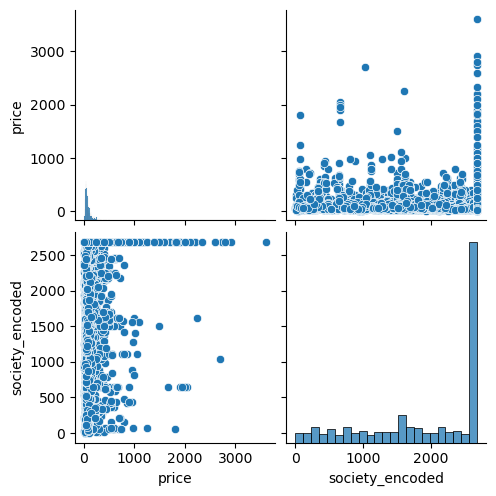

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot (or heatmap for correlation of numerical features)
sns.pairplot(df1[['price', 'society_encoded']])
plt.show()

In [189]:
df2 = df1.drop(['society'], axis = 1)

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area_type        13320 non-null  object  
 1   availability     13320 non-null  object  
 2   location         13319 non-null  object  
 3   size             13304 non-null  object  
 4   total_sqft       13320 non-null  object  
 5   bath             13247 non-null  float64 
 6   balcony          12711 non-null  float64 
 7   price            13320 non-null  float64 
 8   price_category   13320 non-null  category
 9   society_encoded  13320 non-null  int64   
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 949.8+ KB


In [191]:
df2['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [192]:
print(df2.isnull().sum())

# Since 
# location has only 1 null value,
# size has only 16 null values,
# bath has 73 null values,
# balcony has 609 null values,
# we are going to drop those rows
df3 = df2.dropna()
print(df3.shape)
print(df3.isnull().sum())

area_type            0
availability         0
location             1
size                16
total_sqft           0
bath                73
balcony            609
price                0
price_category       0
society_encoded      0
dtype: int64
(12710, 10)
area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
price_category     0
society_encoded    0
dtype: int64


In [193]:
df2.shape

(13320, 10)

splitter function is gonna 

In [194]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_category,society_encoded
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,Low,464
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,High,2439
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,Medium,2688
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,Medium,2186
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,Low,2688


## 4. BHK column has values like 3 bhk from that we taking only numberic value

In [195]:
# df3['size'][0].split(' ')[0]
def splitter(x):
    return str(x).split(' ')[0]

df2['bhk'] = df2['size'].apply(splitter)
df3 = df2.drop(['size', 'society_encoded'], axis=1)

In [196]:
df3.head()

,area_type,availability,location,total_sqft,bath,balcony,price,price_category,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,Low,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,High,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,Medium,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,Medium,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,Low,2


## 5. Convert different values into one standard format: Sqft

In [197]:
from statistics import mean

def total_sqft_col_adjuster(x):
    # Handling ranges like '1200-1500'
    if '-' in x:
        l = x.split('-')  # Split the range
        nl = [float(i) for i in l]  # Convert the strings to floats
        return mean(nl)  # Return the average of the two values
    
    # Convert Sq. Meters to Sqft
    if "Sq. Meter" in x:
        # Extract the number and convert to Sqft
        return float(x.replace("Sq. Meter", "").strip()) * 10.7639
    
    # Convert Sq. Yards to Sqft
    if "Sq. Yards" in x:
        return float(x.replace("Sq. Yards", "").strip()) * 9
    
    # Convert Acres to Sqft
    if "Acres" in x:
        return float(x.replace("Acres", "").strip()) * 43560
    
    # Convert Cents to Sqft
    if "Cents" in x:
        return float(x.replace("Cents", "").strip()) * 435.6
    
    # Convert Grounds to Sqft
    if "Grounds" in x:
        return float(x.replace("Grounds", "").strip()) * 2400
    
    # Convert Gunthas to Sqft
    if "Guntha" in x:
        return float(x.replace("Guntha", "").strip()) * 1089
    
    # Convert Perches to Sqft
    if "Perch" in x:
        return float(x.replace("Perch", "").strip()) * 272.25
    
    # Convert all other values assuming they are in Sqft already
    return float(x)

# creating new_total_sqft col to store all the valid results for total_sqft
df3['new_total_sqft'] = df3['total_sqft'].apply(total_sqft_col_adjuster)

df3.drop('total_sqft', axis=1, inplace=True)
df3.head()

,area_type,availability,location,bath,balcony,price,price_category,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,Low,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,High,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,Medium,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,Medium,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,Low,2,1200.0


In [198]:
"""
The code finds rows in the df3 DataFrame where the new_total_sqft values are not valid numbers.

This helps in identifying any data that can't be used for calculations.
"""

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# which means all are converted into float value to work more word
df3[~df3['new_total_sqft'].apply(is_float)]
df3.head()

#remove the size col
df3.head()

,area_type,availability,location,bath,balcony,price,price_category,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,Low,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,High,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,Medium,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,Medium,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,Low,2,1200.0


In [199]:
# find why we have removed that availability check

In [200]:
df3.head()

,area_type,availability,location,bath,balcony,price,price_category,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,Low,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,High,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,Medium,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,Medium,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,Low,2,1200.0


## 6. Removing the 'availability' columns because if we add that one it will become more complex one

In [201]:
# Drop irrelevant or low-variance features:
for i in df3.columns:
    print(df3[i].value_counts(normalize=True))
    # So from the output, we can see, we can drop
    # availability. The reason is, the "Ready To Move" value dominates others

df3.drop('availability', axis = 1, inplace=True)

# df3['availability'].nunique()
# df3['availability'].unique()

area_type
Super built-up  Area    0.659910
Built-up  Area          0.181532
Plot  Area              0.152027
Carpet  Area            0.006532
Name: proportion, dtype: float64
availability
Ready To Move    0.794369
18-Dec           0.023048
18-May           0.022147
18-Apr           0.020345
18-Aug           0.015015
                   ...   
15-Aug           0.000075
17-Jan           0.000075
16-Nov           0.000075
16-Jan           0.000075
14-Jul           0.000075
Name: proportion, Length: 81, dtype: float64
location
Whitefield                        0.040544
Sarjapur  Road                    0.029957
Electronic City                   0.022674
Kanakpura Road                    0.020497
Thanisandra                       0.017569
                                    ...   
Bapuji Layout                     0.000075
1st Stage Radha Krishna Layout    0.000075
BEML Layout 5th stage             0.000075
singapura paradise                0.000075
Abshot Layout                     0.000075

In [202]:
df3.head()

,area_type,location,bath,balcony,price,price_category,bhk,new_total_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,Low,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,High,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,Medium,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,Medium,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,Low,2,1200.0


## 7. Remove 'balcony' colmun

In [203]:
df3.head()

,area_type,location,bath,balcony,price,price_category,bhk,new_total_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,Low,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,High,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,Medium,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,Medium,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,Low,2,1200.0


In [204]:
# 1. Correlation Check
# Correlation between balcony and price
correlation = df3[['balcony', 'price']].corr()
print(correlation)


          balcony     price
balcony  1.000000  0.120355
price    0.120355  1.000000


In [205]:
# 2 Check missing values in the balcony column
missing_balcony = df3['balcony'].isnull().sum()
total_rows = df3.shape[0]

print(f"Missing values in balcony: {missing_balcony} out of {total_rows}")

Missing values in balcony: 609 out of 13320


In [206]:
# 4. Unique Value Distribution:
# Check how many unique values the balcony column has. If it doesn't vary much, it may not add value to your model.

# Check unique values in balcony column
unique_balcony_values = df3['balcony'].value_counts()
print("Unique values in balcony column:\n", unique_balcony_values)

Unique values in balcony column:
 balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64


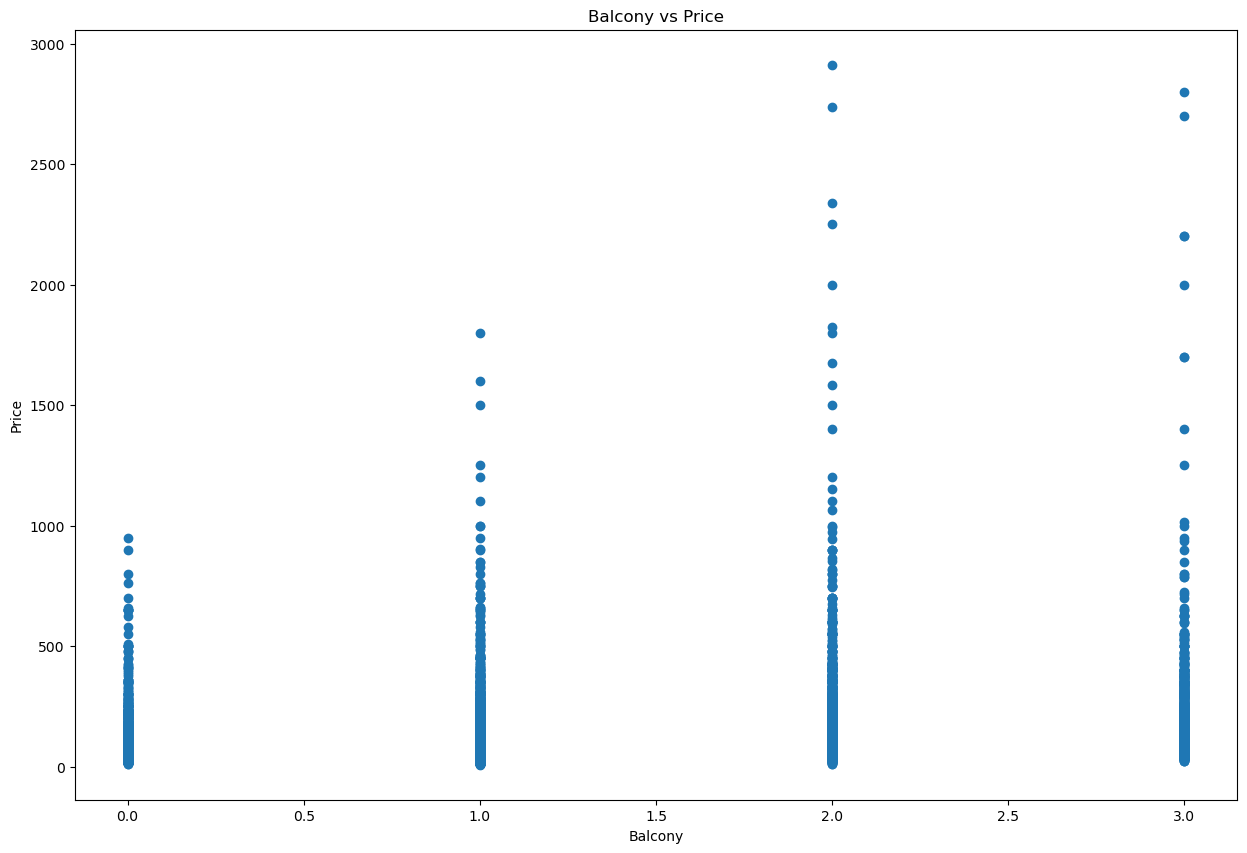

In [207]:
import matplotlib.pyplot as plt

# Scatter plot to visualize relationship between balcony and price
plt.scatter(df3['balcony'], df3['price'])
plt.xlabel('Balcony')
plt.ylabel('Price')
plt.title('Balcony vs Price')
plt.show()

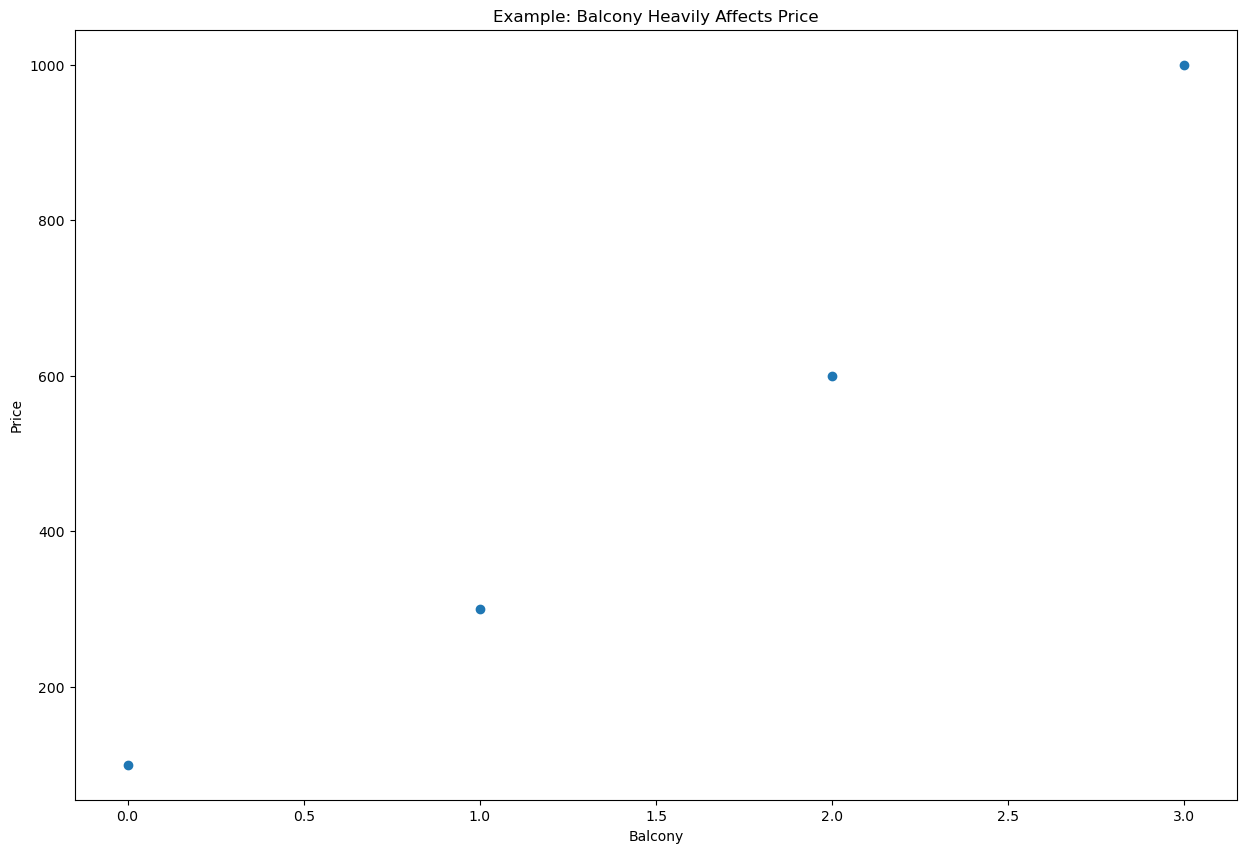

'\n     When the balcony is increasing price also should be increase\n'

In [208]:
# If it is proper plot it should be like this: 

import matplotlib.pyplot as plt
import numpy as np

# Simulating data for a scenario where balcony heavily affects price
balconies = np.array([0, 1, 2, 3])
prices = np.array([100, 300, 600, 1000])

# Creating scatter plot
plt.scatter(balconies, prices)
plt.xlabel('Balcony')
plt.ylabel('Price')
plt.title('Example: Balcony Heavily Affects Price')
plt.show()


"""
     When the balcony is increasing price also should be increase
"""


In [209]:
# plot explanation:  remove
"""
Let’s say you look at the plot and notice that houses with 1 balcony have prices that range from low to high, like from $100 to $1000.
Then, you look at houses with 2 balconies, and you see the same thing—the prices also range from $100 to $1000.
The same is true for houses with 0 or 3 balconies.

This shows that the number of balconies (whether it's 0, 1, 2, or 3) doesn’t really help us figure out the price,
because the price can be high or low no matter how many balconies the house has.

That’s why I decided that the balcony column isn’t important for predicting the price and can be removed.
"""

"\nLet’s say you look at the plot and notice that houses with 1 balcony have prices that range from low to high, like from $100 to $1000.\nThen, you look at houses with 2 balconies, and you see the same thing—the prices also range from $100 to $1000.\nThe same is true for houses with 0 or 3 balconies.\n\nThis shows that the number of balconies (whether it's 0, 1, 2, or 3) doesn’t really help us figure out the price,\nbecause the price can be high or low no matter how many balconies the house has.\n\nThat’s why I decided that the balcony column isn’t important for predicting the price and can be removed.\n"

In [210]:
""" remove 
1. Correlation Check:
    The correlation between the balcony and price columns is 0.12, which indicates a very weak positive correlation.
    This means the number of balconies doesn't have a strong linear relationship with the house price.

2. Unique Value Distribution:
    The balcony column has four distinct values:
    2 balconies: 5113 instances
    1 balcony: 4897 instances
    3 balconies: 1672 instances
    0 balconies: 1029 instances

    While there is variation, the counts show that most properties have either 1 or 2 balconies, with fewer having 0 or 3.
    Despite this variation, the weak correlation indicates that this variation might not be influencing the price significantly.

    3. Visualization:
    The scatter plot of balcony vs. price shows no clear trend or strong pattern between the number of balconies and the house prices.
    The prices seem to be spread out similarly across all balcony categories (0, 1, 2, and 3), suggesting that the number of balconies
    doesn't have a substantial effect on price distribution.
"""

" remove \n1. Correlation Check:\n    The correlation between the balcony and price columns is 0.12, which indicates a very weak positive correlation.\n    This means the number of balconies doesn't have a strong linear relationship with the house price.\n\n2. Unique Value Distribution:\n    The balcony column has four distinct values:\n    2 balconies: 5113 instances\n    1 balcony: 4897 instances\n    3 balconies: 1672 instances\n    0 balconies: 1029 instances\n\n    While there is variation, the counts show that most properties have either 1 or 2 balconies, with fewer having 0 or 3.\n    Despite this variation, the weak correlation indicates that this variation might not be influencing the price significantly.\n\n    3. Visualization:\n    The scatter plot of balcony vs. price shows no clear trend or strong pattern between the number of balconies and the house prices.\n    The prices seem to be spread out similarly across all balcony categories (0, 1, 2, and 3), suggesting that the

In [211]:
df3.head()

,area_type,location,bath,balcony,price,price_category,bhk,new_total_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,Low,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,High,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,Medium,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,Medium,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.0,51.00,Low,2,1200.0


In [212]:
df3.drop('balcony', axis=1, inplace=True)

In [213]:
df3.head()

,area_type,location,bath,price,price_category,bhk,new_total_sqft
0,Super built-up Area,Electronic City Phase II,2.0,39.07,Low,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,120.00,High,4,2600.0
2,Built-up Area,Uttarahalli,2.0,62.00,Medium,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,Medium,3,1521.0
4,Super built-up Area,Kothanur,2.0,51.00,Low,2,1200.0


In [214]:
## ----------- end of balcony column

## 8.  Converting Low Frequency locations as an "Other"

In [215]:
df3['location'].value_counts()

location_and_counts_dictionary = dict()

"""
    "unique_locations" contain all the unique locations
    "counts" contain how many time is apperead respectively

    ex: unique values ['Whitefield', 'Sarjapur  Road']
        counts [512, 444, 555]

    counts contain how many time it is appeared
"""
unique_locations = df3['location'].value_counts().keys().tolist()
counts = df3['location'].value_counts().tolist()


"""
    Now we have to combine them and make it as dictonary
    {
       Whitefield:  512,
       Sarjapur: 444
    }
"""
for i,j in zip(unique_locations, counts):
    location_and_counts_dictionary.update({i:j})


"""
    Both values should be equal
"""
print("len of unique_locations: ", len(unique_locations))
print("len of location_and_counts_dictionary: ", len(location_and_counts_dictionary))


locations_that_count_less_than_10 = []
locations_that_count_not_lessThan10 = []

for i in location_and_counts_dictionary:
     # getting the "value" from each location
    if location_and_counts_dictionary[i] < 10:
        locations_that_count_less_than_10.append(i)
    else:
        locations_that_count_not_lessThan10.append(i)

print(len(locations_that_count_less_than_10))
print(len(locations_that_count_not_lessThan10))


"""
    function will convert:
        > 10: same name
        < 10: other 
"""
def convert_name_as_other(location):
    for i in locations_that_count_less_than_10:
        if location==i:
            return "Other"
    return location

df3['location_new'] = df3['location'].apply(convert_name_as_other)

df3['location_new'].value_counts()

len of unique_locations:  1305
len of location_and_counts_dictionary:  1305
1052
253


location_new
Other               2780
Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
                    ... 
Basapura              10
Dodsworth Layout      10
Kalkere               10
Ganga Nagar           10
Nagadevanahalli       10
Name: count, Length: 254, dtype: int64

## 9. Filtering outliers which are rooms are less than 300

In [216]:
# Convert the 'bhk' column to floats and store in a new column 'bhk_float'
df3['bhk_float'] = df3['bhk'].apply(lambda x: float(x))

df3[df3['new_total_sqft'] / df3['bhk_float'] < 300]

df3 = df3[~ (df3['new_total_sqft']/df3['bhk_float'] < 300)]

In [217]:
df3.head()

,area_type,location,bath,price,price_category,bhk,new_total_sqft,location_new,bhk_float
0,Super built-up Area,Electronic City Phase II,2.0,39.07,Low,2,1056.0,Electronic City Phase II,2.0
1,Plot Area,Chikka Tirupathi,5.0,120.00,High,4,2600.0,Chikka Tirupathi,4.0
2,Built-up Area,Uttarahalli,2.0,62.00,Medium,3,1440.0,Uttarahalli,3.0
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,Medium,3,1521.0,Lingadheeranahalli,3.0
4,Super built-up Area,Kothanur,2.0,51.00,Low,2,1200.0,Kothanur,2.0


## 10. Removing Outliers Based on Price per Square Foot by Location

In [218]:

"""
    Finding the price per square
"""
df3["Price per sqft"] = (df3["price"] * 100000) / (df3["new_total_sqft"])

def removing_pps_outliers(df):
    # Create an empty DataFrame to store the filtered rows
    df_out = pd.DataFrame()

    """
        i = contain location name
        j = location represeding all the rows

        let's say,
        i: Colombo
        j: [ all the rows represending colombo ]

    """
    for i, j in df.groupby('location_new'):
        
        """
            What is the Standard Deviation?
                The standard deviation (denoted as std) measures how spread out the
                values are from the mean. A low standard deviation means the values
                are close to the mean, and a high standard deviation means the values
                are spread out over a wider range.

            Standard Deviation:
                The standard deviation measures how much the individual values deviate
                from the mean. In this case, the standard deviation is 20.55, indicating
                that on average, the values deviate by about 20.55 units from the mean of
                123.33.
        """
        mean = np.mean(j['Price per sqft'])
        std =  np.std(j['Price per sqft'])

       # Calculate the lower and upper bounds for outliers based on mean and standard deviation
        lower_bound = mean - std
        upper_bound = mean + std

        # Filter out rows where "Price per sqft" falls within the acceptable range
        filtered_rows = j[ (j['Price per sqft'] > lower_bound) & (j['Price per sqft'] <= upper_bound)]

        # Concatenate the filtered rows to the output DataFrame, maintaining the index
        df_out = pd.concat([df_out, filtered_rows], ignore_index = True)
    
    return df_out

df3 = removing_pps_outliers(df3)
df3.head()

,area_type,location,bath,price,price_category,bhk,new_total_sqft,location_new,bhk_float,Price per sqft
0,Super built-up Area,Devarachikkanahalli,2.0,44.0,Low,3,1250.0,Devarachikkanahalli,3.0,3520.000000
1,Super built-up Area,Devarachikkanahalli,2.0,40.0,Low,2,1250.0,Devarachikkanahalli,2.0,3200.000000
2,Plot Area,Devarachikkanahalli,2.0,83.0,Medium,2,1200.0,Devarachikkanahalli,2.0,6916.666667
3,Super built-up Area,Devarachikkanahalli,2.0,40.0,Low,2,1170.0,Devarachikkanahalli,2.0,3418.803419
4,Super built-up Area,Devarachikkanahalli,2.0,65.0,Medium,3,1425.0,Devarachikkanahalli,3.0,4561.403509


In [219]:
"""
High-Level Summary:
    Step 1: Calculating Price per Square Foot
    The first step involves calculating the price per square foot for each property.
    This is a common metric in real estate that standardizes the cost of properties by taking into
    account their size, allowing for easier comparison across properties of varying sizes.

Step 2: Grouping by Location
    Next, the data is grouped by location. This is done because real estate prices can vary significantly
    from one location to another. For example, properties in a city center will generally be more expensive
    than those in suburban areas. Grouping ensures that the price per square foot for properties is analyzed
wit hin their specific location, taking into account local market conditions.

Step 3: Removing Outliers
    For each location, the typical price per square foot is calculated using statistical measures
    like the mean and standard deviation. Properties with unusually high or low prices per square
    foot (the outliers) are removed based on this analysis. By doing this, the dataset is cleaned of extreme
    values that could distort analysis or predictions, ensuring that the data is more consistent and reflective
    of typical market conditions within each location.

Step 4: Final Cleaned Data
    After processing all the locations, the cleaned dataset contains only properties with prices per square foot that
    fall within a reasonable range for their respective locations. This cleaned data is now more reliable and ready
    for further analysis, such as building predictive models or performing statistical analysis.
"""

'\nHigh-Level Summary:\n    Step 1: Calculating Price per Square Foot\n    The first step involves calculating the price per square foot for each property.\n    This is a common metric in real estate that standardizes the cost of properties by taking into\n    account their size, allowing for easier comparison across properties of varying sizes.\n\nStep 2: Grouping by Location\n    Next, the data is grouped by location. This is done because real estate prices can vary significantly\n    from one location to another. For example, properties in a city center will generally be more expensive\n    than those in suburban areas. Grouping ensures that the price per square foot for properties is analyzed\nwit hin their specific location, taking into account local market conditions.\n\nStep 3: Removing Outliers\n    For each location, the typical price per square foot is calculated using statistical measures\n    like the mean and standard deviation. Properties with unusually high or low prices

In [220]:
# end of removing the rows based on mean and std---------------------

## 11. Removing 'outliers' where 2BHK price is more than 3BHK

Text(0, 0.5, 'Count')

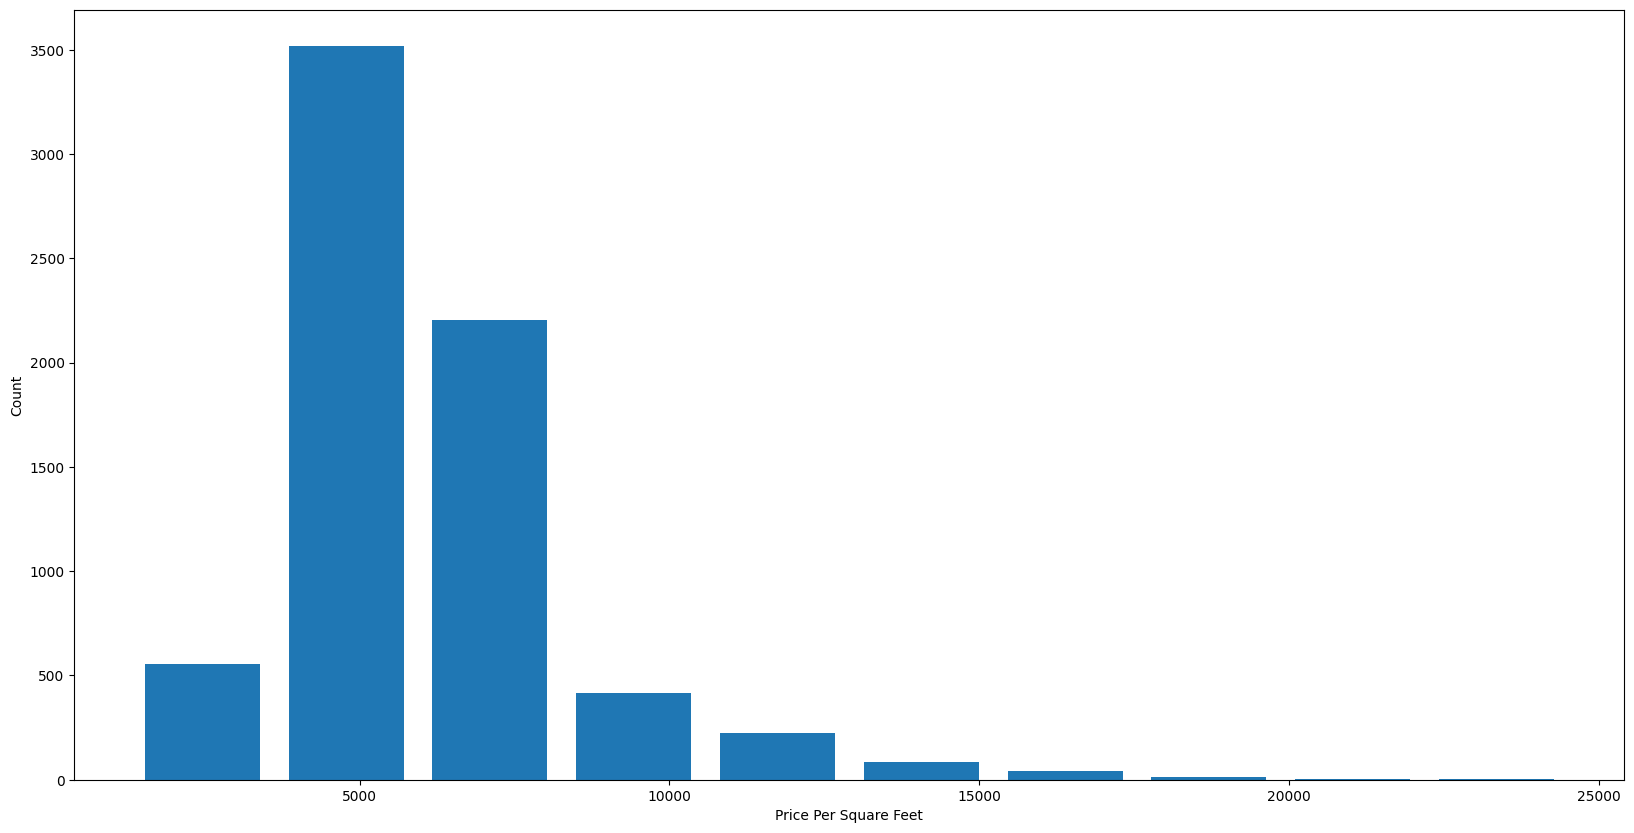

In [ ]:
# Using this one we can say that it is NORMAL ditribution
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4["Price per sqft"],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

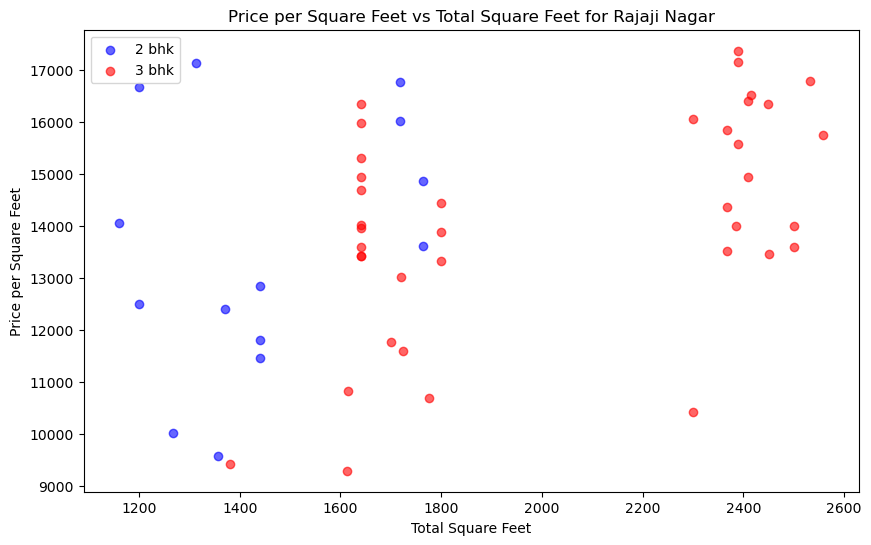

In [227]:
import matplotlib.pyplot as plt

def plot_scatter_plot(df, location):
    
    bhk_2 = df[ (df["location_new"] == location) & (df.bhk == '2') ]
    bhk_3 = df[ (df["location_new"] == location) & (df.bhk == '3') ]
    
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for 2 bhk
    plt.scatter(bhk_2['new_total_sqft'], bhk_2['Price per sqft'], color='blue', label='2 bhk', alpha=0.6)

    # Scatter plot for 3 bhk
    plt.scatter(bhk_3['new_total_sqft'], bhk_3['Price per sqft'], color='red', label='3 bhk', alpha=0.6)
    
    # Adding labels and title
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price per Square Feet')
    plt.title(f'Price per Square Feet vs Total Square Feet for {location}')
    
    # Display legend
    plt.legend()
    
    # Show plot
    plt.show()

# Example usage
plot_scatter_plot(df3, 'Rajaji Nagar')


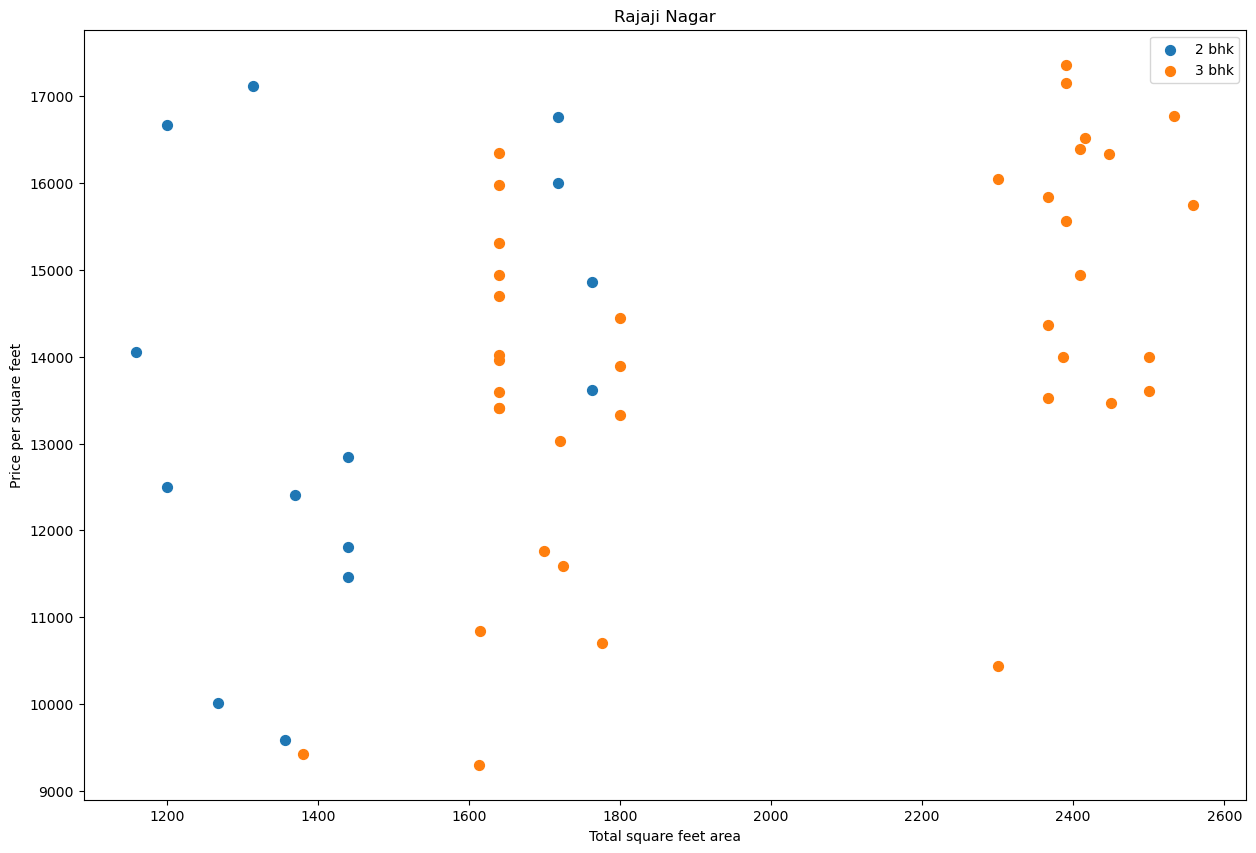

In [228]:
def plot_scatter_plot(df, location):

    bhk_2 = df[(df["location_new"] == location) & (df.bhk=='2')]
    bhk_3 = df[(df["location_new"] == location) & (df.bhk=='3')]

    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk_2['new_total_sqft'] ,bhk_2['Price per sqft'], label='2 bhk' , s=50)
    plt.scatter(bhk_3['new_total_sqft'] ,bhk_3['Price per sqft'], label='3 bhk' , s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()

plot_scatter_plot(df3, 'Rajaji Nagar')

In [ ]:
def remove_bhk_outliers(df):

    to_exclude_indexes = np.array([])
    
    for location, location_df in df.groupby('location_new'):
        bhk_stats = dict()

        for bhk, bhk_df in location_df.groupby('bhk'):
            
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df['Price per sqft']),
                "std": np.std(bhk_df['Price per sqft']),
                "count": bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(str(int(bhk) - 1))
            
            if stats and stats['count'] > 5:
                to_exclude_indexes = np.append(to_exclude_indexes, bhk_df[bhk_df["Price per sqft"] < (stats['mean'])].index.values)

    return df.drop(to_exclude_indexes, axis='index')
            
df4 = remove_bhk_outliers(df3)

In [ ]:
plot_scatter_plot(df4,"Rajaji Nagar")

Text(0, 0.5, 'Count of houses with that count')

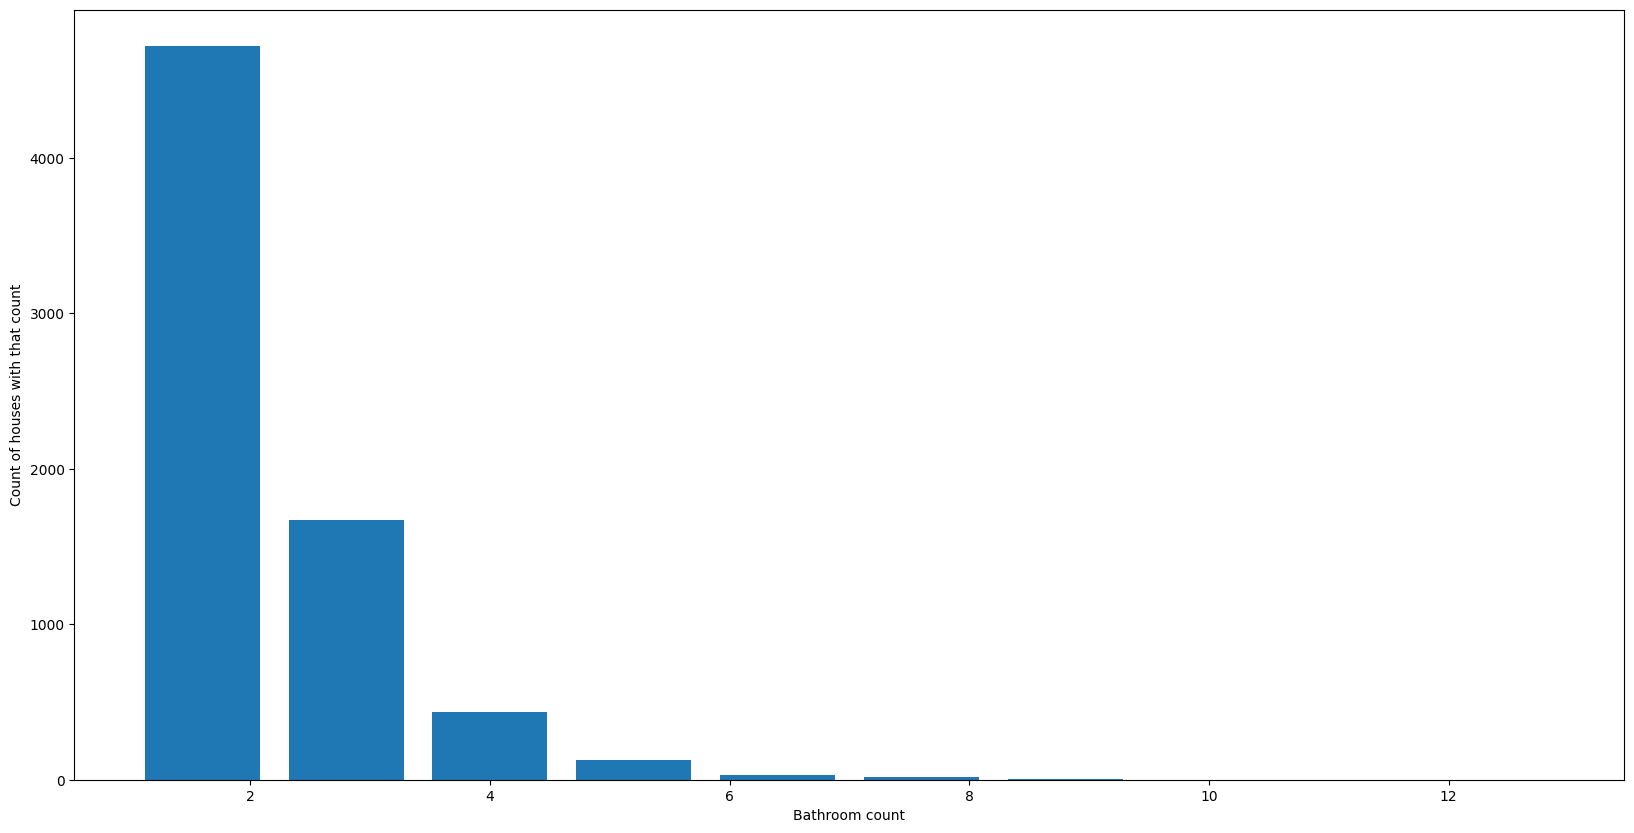

In [ ]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Bathroom count")
plt.ylabel("Count of houses with that count")

In [31]:
#We are not going to use the bhk column cuz it can't be used for the below calcs. We will use the already newly created bhk_float col for this
df4 = df4[df4["bath"] <= df4["bhk_float"] + 1]

In [34]:
dummies = pd.get_dummies(df4["location_new"])

df4 = pd.concat([df4, dummies], axis= 1)
df4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,...,False,False,False,False,False,False,False,False,False,False
5,Super built-up Area,Devarachikkanahalli,947,2.0,2.0,43.0,2,947.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False


In [35]:
area_type_dummies = pd.get_dummies(df4.area_type)

df4 = pd.concat([df4, area_type_dummies], axis=1)

df4 = df4.drop('Carpet  Area', axis='columns')

df4.head()

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
[3 2 0 1]


,area_type,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
1,3,Devarachikkanahalli,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,True
2,2,Devarachikkanahalli,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,True,False
3,3,Devarachikkanahalli,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,True
4,3,Devarachikkanahalli,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,...,False,False,False,False,False,False,False,False,False,True
5,3,Devarachikkanahalli,947,2.0,2.0,43.0,2,947.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,True


In [37]:
df4 = df4.drop('location', axis='columns')

In [38]:
df4 = df4.drop('location_new', axis='columns')
df4 = df4.drop(['total_sqft', 'bhk_float'], axis='columns')

In [41]:
df4.corr().head(6)

,area_type,bath,balcony,price,bhk,new_total_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
area_type,1.000000,-0.072923,0.094151,-0.054184,-0.093966,-0.068722,0.009229,0.005574,-0.027177,0.005106,...,0.036607,0.011546,0.012366,0.004825,-0.023066,0.005574,0.023643,-0.964260,-0.095142,0.911428
bath,-0.072923,1.000000,0.294331,0.605036,0.884513,0.739443,-0.012572,0.022531,0.019040,0.006544,...,-0.027998,0.082789,-0.016654,0.007496,-0.046754,-0.008165,-0.017809,0.036415,0.161397,-0.128831
balcony,0.094151,0.294331,1.000000,0.215493,0.273142,0.283698,0.013719,-0.004679,0.035731,0.005535,...,-0.043357,0.015396,0.022859,0.019893,-0.012656,0.023957,-0.006703,-0.055619,-0.160446,0.147812
price,-0.054184,0.605036,0.215493,1.000000,0.578681,0.824531,-0.018769,0.072587,0.048963,0.023574,...,-0.020705,0.077562,-0.007119,-0.010810,-0.029777,-0.016961,-0.000986,0.012295,0.184234,-0.121974
bhk,-0.093966,0.884513,0.273142,0.578681,1.000000,0.717840,-0.008027,0.031053,0.017314,-0.004641,...,-0.034751,0.057154,-0.003812,-0.002036,-0.047698,-0.011203,-0.027134,0.052662,0.177990,-0.154267
new_total_sqft,-0.068722,0.739443,0.283698,0.824531,0.717840,1.000000,-0.011311,0.025783,0.026654,0.006193,...,-0.014001,0.116966,-0.005281,0.006123,-0.039031,-0.007442,-0.015589,0.035460,0.152975,-0.121183


In [ ]:
df4.drop(['price_category','bhk_float','location', 'location_new'],  axis=1, inplace=True)
df4.head()

## 16. Sweetviz

In [42]:
import sweetviz as sv

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
# analyze_report_with_target = sv.analyze(df1,target_feat='price')
# analyze_report_with_target.show_html('analyze_report_with_target.html', open_browser=True)

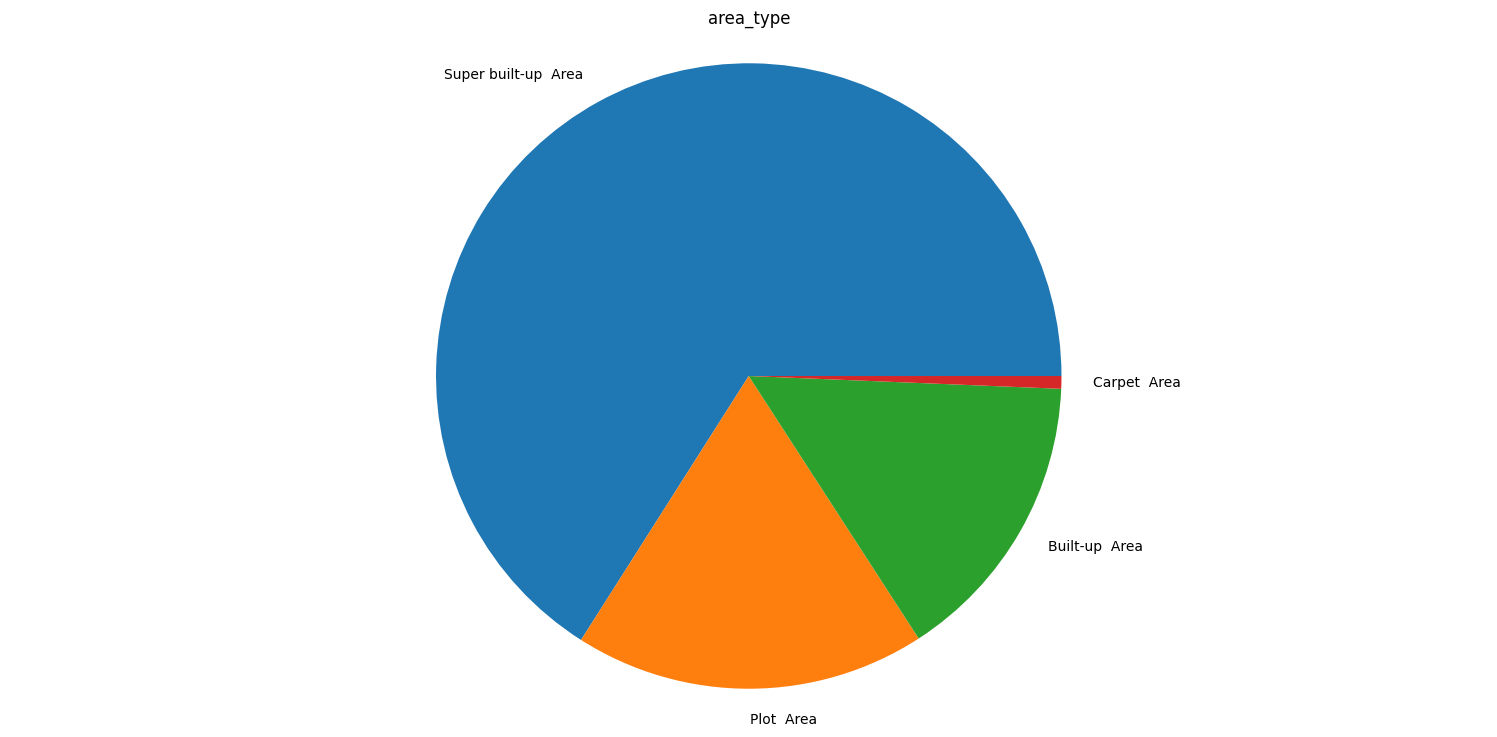

In [44]:
import matplotlib.pyplot as plt

categorical_cols_1 = ['area_type']
    #Did not add "availability" cuz so many variants
    #Did not add "location" cuz so many variants
    #Did the pie chart for "size" col after taking the integer out of it text of "bhk","bedroom". Will do in next few steps.

plt.figure(figsize=(30,50))
ind = 0

for i in categorical_cols_1:
    ind = ind + 1
    plt.subplot(7,2,ind)
    plt.pie(df1[i].value_counts(), labels = df1[i].unique())
    plt.axis('equal')
    plt.title(i)
    
plt.tight_layout()
plt.show()

In [47]:
#Since area_type was 1 hot encoded(since it is a categorical yet nominal we did that noh), and only "Plot Area" has the correlation value > 0.1, we drop other 2 variants.
#
#                   | Built-up Area	 |  Plot Area	|  Super built-up Area
#                   _______________________________________________________
#               	| 0.012295	     |  0.184234	|  -0.121974


df4 = df4.drop(['Built-up  Area', 'Super built-up  Area' ],axis=1)
print(df1.columns)
print(df4.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
Index(['area_type', 'bath', 'balcony', 'price', 'bhk', 'new_total_sqft',
       ' Devarachikkanahalli', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Plot  Area'],
      dtype='object', length=255)


## 20. Save the cleaned dataset

In [51]:
df4.to_csv("../data/cleaned_dataset.csv",index=False)